In [28]:
!pip3 install h5py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 6.8 MB/s eta 0:00:0000:0100:01
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 -m pip install --upgrade pip' command.


In [55]:
import pandas
import matplotlib.pyplot as plt
import h5py
import os
import glob
import numpy as np

In [56]:


train_data_path = '/Users/tylerklimas/Desktop/landslide/TrainData/img'
train_data = glob.glob(os.path.join(train_data_path, '*'))
mask_data_path = '/Users/tylerklimas/Desktop/landslide/TrainData/mask'
mask_data = glob.glob(os.path.join(mask_data_path, '*'))
train_data[1]

'/Users/tylerklimas/Desktop/landslide/TrainData/img/image_112.h5'

(128, 128, 14)


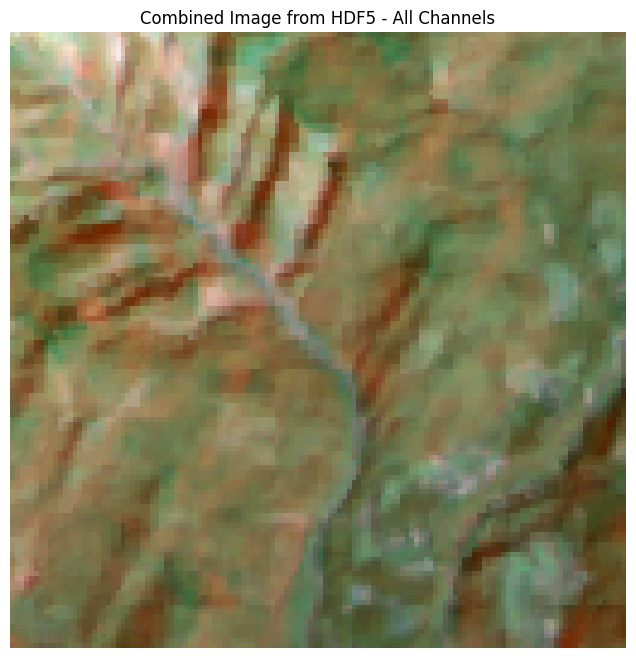

In [88]:
# Path to your HDF5 file
file_path = '/Users/tylerklimas/Desktop/landslide/TrainData/img/image_2.h5'

# Open the HDF5 file in read mode
with h5py.File(file_path, 'r') as f:
    # Assuming there's only one dataset containing image data
    # Access the dataset directly by name
    dataset_name = list(f.keys())[0]  # Assuming the first dataset is the image data
    dataset = f[dataset_name][:]
    
    # Combine all channels into a single image
    combined_image = np.zeros_like(dataset[:, :, 0:3], dtype=np.float32)  # Initialize with the first three channels
    for i in range(dataset.shape[2]):
        combined_image[:, :, i % 3] += dataset[:, :, i]  # Sum all channels modulo 3 (for RGB display)
    
    # Normalize the combined image to [0, 1]
    combined_image -= combined_image.min()
    combined_image /= combined_image.max()
    
    # Display the combined image using matplotlib
    plt.figure(figsize=(8, 8))
    plt.imshow(combined_image)
    plt.axis('off')
    plt.title('Combined Image from HDF5 - All Channels')
    plt.show()

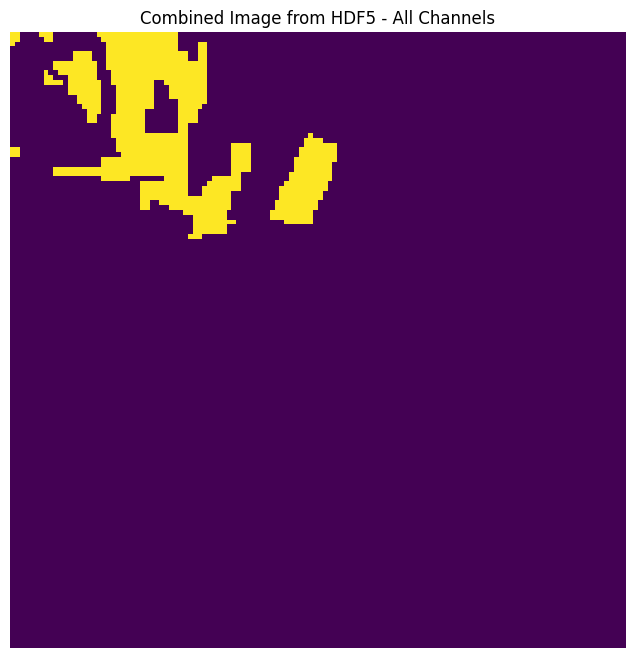

In [90]:
# Path to your HDF5 file
file_path = '/Users/tylerklimas/Desktop/landslide/TrainData/mask/mask_2.h5'

# Open the HDF5 file in read mode
with h5py.File(file_path, 'r') as f:
    # Assuming there's only one dataset containing image data
    # Access the dataset directly by name
    dataset_name = list(f.keys())[0]  # Assuming the first dataset is the image data
    dataset = f[dataset_name][:]

    # Display the combined image using matplotlib
    plt.figure(figsize=(8, 8))
    plt.imshow(dataset)
    plt.axis('off')
    plt.title('Combined Image from HDF5 - All Channels')
    plt.show()

In [91]:
train_path = '/Users/tylerklimas/Desktop/landslide/TrainData/img/*.h5'
mask_path = '/Users/tylerklimas/Desktop/landslide/TrainData/mask/*.h5'

train_XX = np.zeros((3799, 128, 128, 6))
train_YY = np.zeros((3799, 128, 128, 1))

all_train = sorted(glob.glob(train_path))
all_mask = sorted(glob.glob(mask_path))

In [93]:
for i, (img, mask) in enumerate(zip(all_train, all_mask)):
    print(i, img, mask)
    with h5py.File(img) as hdf:
        ls = list(hdf.keys())
        data = np.array(hdf.get('img'))

        data[np.isnan(data)] = 0.000001

        mid_rgb = data[:,:, 1:4].max() / 2.0
        mid_slope = data[:,:, 12].max() / 2.0
        mid_elevation = data[:,:, 13].max() / 2.0



        data_red = data[:,:, 3]
        data_nir = data[:,:, 7]
        data_ndvi = np.divide(data_nir - data_red, np.add(data_nir, data_red))


        train_XX[i, :, :, 0] = 1 - data[:, :, 3] / mid_rgb #RED
        train_XX[i, :, :, 1] = 1 - data[:, :, 2] / mid_rgb #GREEN
        train_XX[i, :, :, 2] = 1 - data[:, :, 1] / mid_rgb #BLUE
        train_XX[i, :, :, 3] = data_ndvi                   #NDVI

        train_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope
        train_XX[i, :, :, 5] = 1 - data[:, :, 13] / mid_elevation


    
    with h5py.File(mask) as hdf:
        ls = list(hdf.keys())
        data = np.array(hdf.get('mask'))
        train_YY[i, :, :, 0] = data
        

        
        

        

0 /Users/tylerklimas/Desktop/landslide/TrainData/img/image_1.h5 /Users/tylerklimas/Desktop/landslide/TrainData/mask/mask_1.h5
1 /Users/tylerklimas/Desktop/landslide/TrainData/img/image_10.h5 /Users/tylerklimas/Desktop/landslide/TrainData/mask/mask_10.h5
2 /Users/tylerklimas/Desktop/landslide/TrainData/img/image_100.h5 /Users/tylerklimas/Desktop/landslide/TrainData/mask/mask_100.h5
3 /Users/tylerklimas/Desktop/landslide/TrainData/img/image_1000.h5 /Users/tylerklimas/Desktop/landslide/TrainData/mask/mask_1000.h5
4 /Users/tylerklimas/Desktop/landslide/TrainData/img/image_1001.h5 /Users/tylerklimas/Desktop/landslide/TrainData/mask/mask_1001.h5
5 /Users/tylerklimas/Desktop/landslide/TrainData/img/image_1002.h5 /Users/tylerklimas/Desktop/landslide/TrainData/mask/mask_1002.h5
6 /Users/tylerklimas/Desktop/landslide/TrainData/img/image_1003.h5 /Users/tylerklimas/Desktop/landslide/TrainData/mask/mask_1003.h5
7 /Users/tylerklimas/Desktop/landslide/TrainData/img/image_1004.h5 /Users/tylerklimas/De

/var/folders/1f/_7z9t82101973t_1gxmf2vwc0000gn/T/ipykernel_59237/3076825626.py:25: RuntimeWarning: invalid value encountered in divide
  train_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope


1685 /Users/tylerklimas/Desktop/landslide/TrainData/img/image_2515.h5 /Users/tylerklimas/Desktop/landslide/TrainData/mask/mask_2515.h5
1686 /Users/tylerklimas/Desktop/landslide/TrainData/img/image_2516.h5 /Users/tylerklimas/Desktop/landslide/TrainData/mask/mask_2516.h5
1687 /Users/tylerklimas/Desktop/landslide/TrainData/img/image_2517.h5 /Users/tylerklimas/Desktop/landslide/TrainData/mask/mask_2517.h5
1688 /Users/tylerklimas/Desktop/landslide/TrainData/img/image_2518.h5 /Users/tylerklimas/Desktop/landslide/TrainData/mask/mask_2518.h5
1689 /Users/tylerklimas/Desktop/landslide/TrainData/img/image_2519.h5 /Users/tylerklimas/Desktop/landslide/TrainData/mask/mask_2519.h5
1690 /Users/tylerklimas/Desktop/landslide/TrainData/img/image_252.h5 /Users/tylerklimas/Desktop/landslide/TrainData/mask/mask_252.h5
1691 /Users/tylerklimas/Desktop/landslide/TrainData/img/image_2520.h5 /Users/tylerklimas/Desktop/landslide/TrainData/mask/mask_2520.h5
1692 /Users/tylerklimas/Desktop/landslide/TrainData/img/i

/var/folders/1f/_7z9t82101973t_1gxmf2vwc0000gn/T/ipykernel_59237/3076825626.py:17: RuntimeWarning: invalid value encountered in divide
  data_ndvi = np.divide(data_nir - data_red, np.add(data_nir, data_red))


2277 /Users/tylerklimas/Desktop/landslide/TrainData/img/image_3048.h5 /Users/tylerklimas/Desktop/landslide/TrainData/mask/mask_3048.h5
2278 /Users/tylerklimas/Desktop/landslide/TrainData/img/image_3049.h5 /Users/tylerklimas/Desktop/landslide/TrainData/mask/mask_3049.h5
2279 /Users/tylerklimas/Desktop/landslide/TrainData/img/image_305.h5 /Users/tylerklimas/Desktop/landslide/TrainData/mask/mask_305.h5
2280 /Users/tylerklimas/Desktop/landslide/TrainData/img/image_3050.h5 /Users/tylerklimas/Desktop/landslide/TrainData/mask/mask_3050.h5
2281 /Users/tylerklimas/Desktop/landslide/TrainData/img/image_3051.h5 /Users/tylerklimas/Desktop/landslide/TrainData/mask/mask_3051.h5
2282 /Users/tylerklimas/Desktop/landslide/TrainData/img/image_3052.h5 /Users/tylerklimas/Desktop/landslide/TrainData/mask/mask_3052.h5
2283 /Users/tylerklimas/Desktop/landslide/TrainData/img/image_3053.h5 /Users/tylerklimas/Desktop/landslide/TrainData/mask/mask_3053.h5
2284 /Users/tylerklimas/Desktop/landslide/TrainData/img/i

In [96]:
# min max test to make sure data was loaded properly

train_XX[np.isnan(train_XX)] = 0.000001
min = np.min(train_XX)
max = np.max(train_XX)

miny = np.min(train_YY)
maxy = np.max(train_YY)
print(min, max, miny, maxy)


-1.0 1.0 0.0 1.0


In [98]:
import torch
def dice_loss(y_true, y_pred):
    y_true = torch.from_numpy(y_true)
    y_pred = torch.sigmoid(y_pred)
    numerator = 2 * torch.sum(y_true * y_pred)
    denominator = torch.sum(y_true + y_pred)

    return 1 - numerator / denominator



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.7836734693877552].


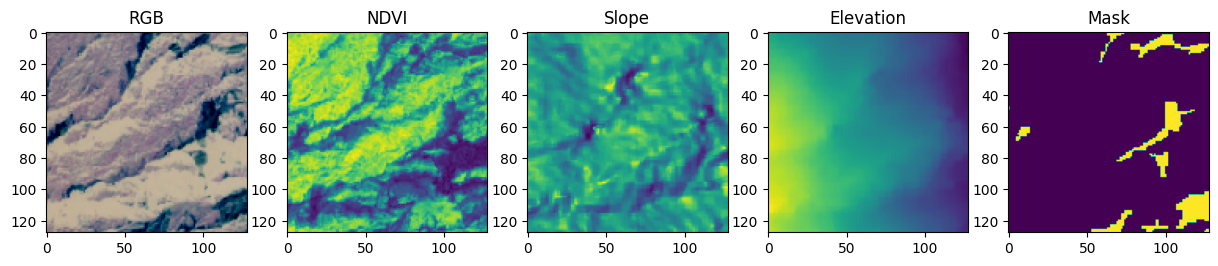

In [100]:
img=234
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(15, 10))

ax1.set_title("RGB")
ax2.set_title("NDVI")
ax3.set_title("Slope")
ax4.set_title("Elevation")
ax5.set_title("Mask")

ax1.imshow(train_XX[img, :, :, 0:3])
ax2.imshow(train_XX[img, :, :, 3])
ax3.imshow(train_XX[img, :, :, 4])
ax4.imshow(train_XX[img, :, :, 5])
ax5.imshow(train_YY[img, :, :, 0])





In [108]:
from torch.utils.data import DataLoader, random_split, TensorDataset


train_x = torch.tensor(train_XX)
train_y = torch.tensor(train_YY)
dataset = TensorDataset(train_x, train_y)

# Define the split lengths
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

# Split the dataset
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Optionally, create DataLoaders for batching
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)



# for data, labels in train_loader:
#     print(data, labels)
#     break

tensor([[[[ 0.6600,  0.5758,  0.6189,  0.3997,  0.5610, -0.9981],
          [ 0.6676,  0.6002,  0.6272,  0.3420,  0.5610, -0.9981],
          [ 0.6533,  0.5809,  0.6122,  0.3418,  0.5366, -0.9981],
          ...,
          [ 0.6820,  0.5912,  0.6070,  0.4361, -0.3171,  0.1755],
          [ 0.6762,  0.5867,  0.6013,  0.4281, -0.3171,  0.2052],
          [ 0.6561,  0.5726,  0.6003,  0.4325, -0.3171,  0.2052]],

         [[ 0.6839,  0.6188,  0.6318,  0.3875,  0.5854, -0.9926],
          [ 0.6667,  0.5983,  0.6303,  0.3604,  0.5854, -0.9926],
          [ 0.6619,  0.5803,  0.6251,  0.3642,  0.5366, -0.9907],
          ...,
          [ 0.6360,  0.5552,  0.5858,  0.4112, -0.3171,  0.1885],
          [ 0.6284,  0.5417,  0.5868,  0.4127, -0.3171,  0.2182],
          [ 0.6255,  0.5391,  0.5962,  0.4096, -0.3171,  0.2182]],

         [[ 0.6810,  0.6047,  0.6323,  0.3789,  0.5122, -0.9851],
          [ 0.6676,  0.6124,  0.6241,  0.3418,  0.5122, -0.9851],
          [ 0.6772,  0.5983,  0.6329,  0.3

In [126]:
print(dataset.tensors[0].shape)

torch.Size([3799, 128, 128, 6])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.6990881458966565].


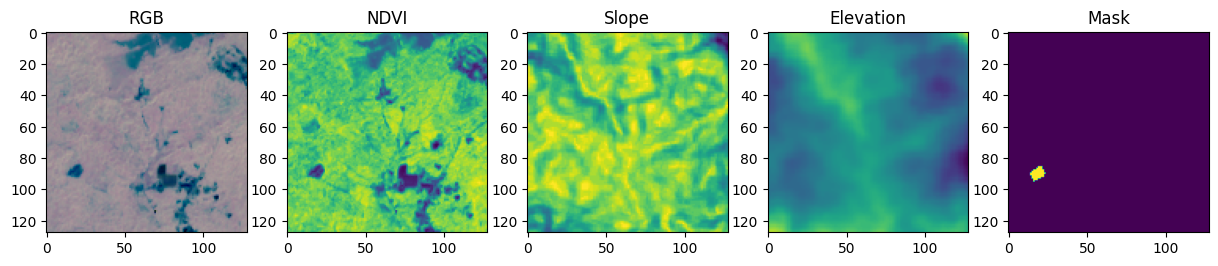

In [127]:
img=254

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(15, 10))

ax1.set_title("RGB")
ax2.set_title("NDVI")
ax3.set_title("Slope")
ax4.set_title("Elevation")
ax5.set_title("Mask")

ax1.imshow(train_dataset[img][0][:,:, 0:3])  # Assuming train_dataset[img] is a tuple of (data, label)
ax2.imshow(train_dataset[img][0][:, :, 3])
ax3.imshow(train_dataset[img][0][:, :, 4])
ax4.imshow(train_dataset[img][0][:, :, 5])
ax5.imshow(train_dataset[img][1][:, :, ]) 

plt.show()

In [139]:
import torch.nn as nn
import torch.nn.functional as F

class TinyVGModel(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super(TinyVGModel, self).__init__()
        self.convblock1 = nn.Sequential(
            
             nn.Conv2d(input_shape, hidden_units, kernel_size=3, stride=1, padding=1),
             nn.ReLU(),
             nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
             nn.ReLU(),
             nn.MaxPool2d(kernel_size=2,
                         stride=2)
               
        )
        self.convblock2 = nn.Sequential(
            
             nn.Conv2d(hidden_units, hidden_units, kernel_size=3, stride=1, padding=1),
             nn.ReLU(),
             nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
             nn.ReLU(),
             nn.MaxPool2d(kernel_size=2,
                         stride=2)
               
        )

  
        self.ln1 = nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        
        
    def forward(self, x):
        print('1', x.shape)
        x = self.convblock1(x)
        print('2', x.shape)
        x = self.convblock2(x)
        print('3', x.shape)
        x = nn.Flatten()(x)
        print('3.5', x.shape)
        x = self.ln1(x)
        print('4', x.shape)
        x = nn.Softmax(dim=1)(x)
        
        return x

In [140]:
import torch.optim as optim

model = TinyVGModel(128, 5, 128)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)


def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    train_loss, train_acc = 0, 0
    model.train()
    for data in dataloader:


        ypred = model(data[0].float())
        print(data[0].shape)
        optimizer.zero_grad()
        
        loss = loss_fn(ypred, data[1])

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        
        ypred_class = torch.argmax(ypred, dim=1)
        train_acc += (ypred_class == data[1]).sum().item()/len(ypred)
        
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc
    
train_step(model, dataset, loss_fn, optimizer)

1 torch.Size([128, 128, 6])
2 torch.Size([5, 64, 3])
3 torch.Size([5, 32, 1])
3.5 torch.Size([5, 32])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (5x32 and 1280x128)